# Simon & Garfunkel Lyric Generator

This notebook contains code for an MLP neural network that generates lyrics from the American rock due Simon & Garfunkel. Generation is done on a word-level basis. Lyrics are taken from [LINK HERE]

### Import Libraries

In [1]:
import re
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import nltk
from tqdm import tqdm
import torch.optim as optim
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Input

In [2]:
# Read input
filename = "SM.txt"
f = open(filename, 'r')

raw_text = f.read()
raw_text

'ï»¿"Leaves That Are Green"\n\n\nI was twenty-one years when I wrote this song\nI\'m twenty-two now, but I won\'t be for long\nTime hurries on\nAnd the leaves that are green turn to brown\nAnd they wither with the wind\nAnd they crumble in your hand\n\n\nOnce my heart was filled with love of a girl\nI held her close, but she faded in the night\nLike a poem I meant to write\nAnd the leaves that are green turn to brown\nAnd they wither with the wind\nAnd they crumble in your hand\n\n\nI threw a pebble in a brook\nAnd watched the ripples run away\nAnd they never made a sound\nAnd the leaves that are green turn to brown\nAnd they wither with the wind\nAnd they crumble in your hand\nHello, Hello, Hello, Hello\nGood-bye, Good-bye\nGood-bye, Good-bye\nThat\'s all there is\n\n\nAnd the leaves that are green turn to brown\n________________\n\n\n"The Sound Of Silence"\n\n\nHello, darkness, my old friend\nI\'ve come to talk with you again\nBecause a vision softly creeping\nLeft its seeds while I 

In [3]:
# Remove all non-ASCII characters
processed_text = re.sub(r'[^\x00-\x7f]', r'', raw_text)
processed_text

'"Leaves That Are Green"\n\n\nI was twenty-one years when I wrote this song\nI\'m twenty-two now, but I won\'t be for long\nTime hurries on\nAnd the leaves that are green turn to brown\nAnd they wither with the wind\nAnd they crumble in your hand\n\n\nOnce my heart was filled with love of a girl\nI held her close, but she faded in the night\nLike a poem I meant to write\nAnd the leaves that are green turn to brown\nAnd they wither with the wind\nAnd they crumble in your hand\n\n\nI threw a pebble in a brook\nAnd watched the ripples run away\nAnd they never made a sound\nAnd the leaves that are green turn to brown\nAnd they wither with the wind\nAnd they crumble in your hand\nHello, Hello, Hello, Hello\nGood-bye, Good-bye\nGood-bye, Good-bye\nThat\'s all there is\n\n\nAnd the leaves that are green turn to brown\n________________\n\n\n"The Sound Of Silence"\n\n\nHello, darkness, my old friend\nI\'ve come to talk with you again\nBecause a vision softly creeping\nLeft its seeds while I was

In [4]:
# Get word tokens from lyrics
word_tokens = word_tokenize(processed_text)
print(f"Number of word tokens: {word_tokens}")

Number of word tokens: ['``', 'Leaves', 'That', 'Are', 'Green', "''", 'I', 'was', 'twenty-one', 'years', 'when', 'I', 'wrote', 'this', 'song', 'I', "'m", 'twenty-two', 'now', ',', 'but', 'I', 'wo', "n't", 'be', 'for', 'long', 'Time', 'hurries', 'on', 'And', 'the', 'leaves', 'that', 'are', 'green', 'turn', 'to', 'brown', 'And', 'they', 'wither', 'with', 'the', 'wind', 'And', 'they', 'crumble', 'in', 'your', 'hand', 'Once', 'my', 'heart', 'was', 'filled', 'with', 'love', 'of', 'a', 'girl', 'I', 'held', 'her', 'close', ',', 'but', 'she', 'faded', 'in', 'the', 'night', 'Like', 'a', 'poem', 'I', 'meant', 'to', 'write', 'And', 'the', 'leaves', 'that', 'are', 'green', 'turn', 'to', 'brown', 'And', 'they', 'wither', 'with', 'the', 'wind', 'And', 'they', 'crumble', 'in', 'your', 'hand', 'I', 'threw', 'a', 'pebble', 'in', 'a', 'brook', 'And', 'watched', 'the', 'ripples', 'run', 'away', 'And', 'they', 'never', 'made', 'a', 'sound', 'And', 'the', 'leaves', 'that', 'are', 'green', 'turn', 'to', 'br

In [5]:
# Get unique word tokens from word tokens
unique_words = sorted(list(set(word_tokens)))
print(f"Number of unique word tokens: {unique_words}")

Number of unique word tokens: ['!', "'", "''", "'Cause", "'Neath", "'d", "'ll", "'m", "'re", "'s", "'ve", ',', '.', ':', ';', '?', 'A', 'Aberdeen', 'Ah', 'All', 'Am', 'And', 'April', 'Are', 'As', 'August', 'Bad', 'Because', 'Before', 'Belton', 'Blessed', 'Born', 'Bound', 'But', 'Ca', 'Come', 'Cory', 'December', 'Diary', 'Disturb', 'Do', 'England', 'Every', 'Find', 'Fly', 'Fools', 'Friendship', 'Gazing', 'Goin', 'Good-bye', 'Got', 'Green', 'Groovy', 'He', 'Hear', 'Hello', 'Her', 'Hiding', 'Home', 'Homeward', 'I', 'If', 'In', 'It', 'Its', 'July', 'June', 'Kathy', 'Leaves', 'Left', 'Like', 'Lord', 'Man', 'May', 'Me', 'Moon', 'Most', 'Mrs.', 'Much', 'My', 'Narrow', 'No', 'O', 'Of', 'Oh', 'On', 'Once', 'Peculiar', 'People', 'Reflecting', 'Resting', 'Richard', 'Riordan', 'Rock', 'Rose', 'Safe', 'Saturday', 'September', 'She', 'Silence', 'Silently', 'So', 'Soft', 'Soho', 'Somewhere', 'Song', 'Sound', 'Still', 'Take', 'Tapping', 'Ten', 'That', 'The', 'There', 'They', 'Thing', 'Though', 'Throug

In [6]:
# Create vocabulary of word tokens
word_vocabulary = unique_words
word_vocabulary

['!',
 "'",
 "''",
 "'Cause",
 "'Neath",
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 ',',
 '.',
 ':',
 ';',
 '?',
 'A',
 'Aberdeen',
 'Ah',
 'All',
 'Am',
 'And',
 'April',
 'Are',
 'As',
 'August',
 'Bad',
 'Because',
 'Before',
 'Belton',
 'Blessed',
 'Born',
 'Bound',
 'But',
 'Ca',
 'Come',
 'Cory',
 'December',
 'Diary',
 'Disturb',
 'Do',
 'England',
 'Every',
 'Find',
 'Fly',
 'Fools',
 'Friendship',
 'Gazing',
 'Goin',
 'Good-bye',
 'Got',
 'Green',
 'Groovy',
 'He',
 'Hear',
 'Hello',
 'Her',
 'Hiding',
 'Home',
 'Homeward',
 'I',
 'If',
 'In',
 'It',
 'Its',
 'July',
 'June',
 'Kathy',
 'Leaves',
 'Left',
 'Like',
 'Lord',
 'Man',
 'May',
 'Me',
 'Moon',
 'Most',
 'Mrs.',
 'Much',
 'My',
 'Narrow',
 'No',
 'O',
 'Of',
 'Oh',
 'On',
 'Once',
 'Peculiar',
 'People',
 'Reflecting',
 'Resting',
 'Richard',
 'Riordan',
 'Rock',
 'Rose',
 'Safe',
 'Saturday',
 'September',
 'She',
 'Silence',
 'Silently',
 'So',
 'Soft',
 'Soho',
 'Somewhere',
 'Song',
 'Sound',
 'Still',
 'Take'

In [7]:
# Create index-word mappings 
indices_words = dict((index, word) for index, word in enumerate(unique_words))
indices_words

{0: '!',
 1: "'",
 2: "''",
 3: "'Cause",
 4: "'Neath",
 5: "'d",
 6: "'ll",
 7: "'m",
 8: "'re",
 9: "'s",
 10: "'ve",
 11: ',',
 12: '.',
 13: ':',
 14: ';',
 15: '?',
 16: 'A',
 17: 'Aberdeen',
 18: 'Ah',
 19: 'All',
 20: 'Am',
 21: 'And',
 22: 'April',
 23: 'Are',
 24: 'As',
 25: 'August',
 26: 'Bad',
 27: 'Because',
 28: 'Before',
 29: 'Belton',
 30: 'Blessed',
 31: 'Born',
 32: 'Bound',
 33: 'But',
 34: 'Ca',
 35: 'Come',
 36: 'Cory',
 37: 'December',
 38: 'Diary',
 39: 'Disturb',
 40: 'Do',
 41: 'England',
 42: 'Every',
 43: 'Find',
 44: 'Fly',
 45: 'Fools',
 46: 'Friendship',
 47: 'Gazing',
 48: 'Goin',
 49: 'Good-bye',
 50: 'Got',
 51: 'Green',
 52: 'Groovy',
 53: 'He',
 54: 'Hear',
 55: 'Hello',
 56: 'Her',
 57: 'Hiding',
 58: 'Home',
 59: 'Homeward',
 60: 'I',
 61: 'If',
 62: 'In',
 63: 'It',
 64: 'Its',
 65: 'July',
 66: 'June',
 67: 'Kathy',
 68: 'Leaves',
 69: 'Left',
 70: 'Like',
 71: 'Lord',
 72: 'Man',
 73: 'May',
 74: 'Me',
 75: 'Moon',
 76: 'Most',
 77: 'Mrs.',
 78: 

In [8]:
# Create word-index mappings
word_indices = dict((word, index) for index, word in enumerate(unique_words))
word_indices

{'!': 0,
 "'": 1,
 "''": 2,
 "'Cause": 3,
 "'Neath": 4,
 "'d": 5,
 "'ll": 6,
 "'m": 7,
 "'re": 8,
 "'s": 9,
 "'ve": 10,
 ',': 11,
 '.': 12,
 ':': 13,
 ';': 14,
 '?': 15,
 'A': 16,
 'Aberdeen': 17,
 'Ah': 18,
 'All': 19,
 'Am': 20,
 'And': 21,
 'April': 22,
 'Are': 23,
 'As': 24,
 'August': 25,
 'Bad': 26,
 'Because': 27,
 'Before': 28,
 'Belton': 29,
 'Blessed': 30,
 'Born': 31,
 'Bound': 32,
 'But': 33,
 'Ca': 34,
 'Come': 35,
 'Cory': 36,
 'December': 37,
 'Diary': 38,
 'Disturb': 39,
 'Do': 40,
 'England': 41,
 'Every': 42,
 'Find': 43,
 'Fly': 44,
 'Fools': 45,
 'Friendship': 46,
 'Gazing': 47,
 'Goin': 48,
 'Good-bye': 49,
 'Got': 50,
 'Green': 51,
 'Groovy': 52,
 'He': 53,
 'Hear': 54,
 'Hello': 55,
 'Her': 56,
 'Hiding': 57,
 'Home': 58,
 'Homeward': 59,
 'I': 60,
 'If': 61,
 'In': 62,
 'It': 63,
 'Its': 64,
 'July': 65,
 'June': 66,
 'Kathy': 67,
 'Leaves': 68,
 'Left': 69,
 'Like': 70,
 'Lord': 71,
 'Man': 72,
 'May': 73,
 'Me': 74,
 'Moon': 75,
 'Most': 76,
 'Mrs.': 77,
 'Muc

In [9]:
# Create x (input): Split lyrics into blocks, where each block has the same amount of words
# Create y (targets): For each x input, the y is the word that comes next
# The model should learn to predict y from the input x

block_size = 3
step = 1

x = []
y = []

for i in range(0, len(word_tokens) - block_size, step):
    x.append(word_tokens[i: i+block_size])
    y.append(word_tokens[i + block_size])

In [10]:
# Inspect x
x

[['``', 'Leaves', 'That'],
 ['Leaves', 'That', 'Are'],
 ['That', 'Are', 'Green'],
 ['Are', 'Green', "''"],
 ['Green', "''", 'I'],
 ["''", 'I', 'was'],
 ['I', 'was', 'twenty-one'],
 ['was', 'twenty-one', 'years'],
 ['twenty-one', 'years', 'when'],
 ['years', 'when', 'I'],
 ['when', 'I', 'wrote'],
 ['I', 'wrote', 'this'],
 ['wrote', 'this', 'song'],
 ['this', 'song', 'I'],
 ['song', 'I', "'m"],
 ['I', "'m", 'twenty-two'],
 ["'m", 'twenty-two', 'now'],
 ['twenty-two', 'now', ','],
 ['now', ',', 'but'],
 [',', 'but', 'I'],
 ['but', 'I', 'wo'],
 ['I', 'wo', "n't"],
 ['wo', "n't", 'be'],
 ["n't", 'be', 'for'],
 ['be', 'for', 'long'],
 ['for', 'long', 'Time'],
 ['long', 'Time', 'hurries'],
 ['Time', 'hurries', 'on'],
 ['hurries', 'on', 'And'],
 ['on', 'And', 'the'],
 ['And', 'the', 'leaves'],
 ['the', 'leaves', 'that'],
 ['leaves', 'that', 'are'],
 ['that', 'are', 'green'],
 ['are', 'green', 'turn'],
 ['green', 'turn', 'to'],
 ['turn', 'to', 'brown'],
 ['to', 'brown', 'And'],
 ['brown', 'And'

In [11]:
# Inspect y
y

['Are',
 'Green',
 "''",
 'I',
 'was',
 'twenty-one',
 'years',
 'when',
 'I',
 'wrote',
 'this',
 'song',
 'I',
 "'m",
 'twenty-two',
 'now',
 ',',
 'but',
 'I',
 'wo',
 "n't",
 'be',
 'for',
 'long',
 'Time',
 'hurries',
 'on',
 'And',
 'the',
 'leaves',
 'that',
 'are',
 'green',
 'turn',
 'to',
 'brown',
 'And',
 'they',
 'wither',
 'with',
 'the',
 'wind',
 'And',
 'they',
 'crumble',
 'in',
 'your',
 'hand',
 'Once',
 'my',
 'heart',
 'was',
 'filled',
 'with',
 'love',
 'of',
 'a',
 'girl',
 'I',
 'held',
 'her',
 'close',
 ',',
 'but',
 'she',
 'faded',
 'in',
 'the',
 'night',
 'Like',
 'a',
 'poem',
 'I',
 'meant',
 'to',
 'write',
 'And',
 'the',
 'leaves',
 'that',
 'are',
 'green',
 'turn',
 'to',
 'brown',
 'And',
 'they',
 'wither',
 'with',
 'the',
 'wind',
 'And',
 'they',
 'crumble',
 'in',
 'your',
 'hand',
 'I',
 'threw',
 'a',
 'pebble',
 'in',
 'a',
 'brook',
 'And',
 'watched',
 'the',
 'ripples',
 'run',
 'away',
 'And',
 'they',
 'never',
 'made',
 'a',
 'sound

In [12]:
# Convert each word in y into their corresponding indices
y_ints = [word_indices[item] for item in y]
y_ints

[23,
 51,
 2,
 60,
 642,
 624,
 686,
 652,
 60,
 684,
 600,
 553,
 60,
 7,
 625,
 430,
 11,
 185,
 60,
 671,
 415,
 163,
 280,
 380,
 118,
 348,
 434,
 21,
 594,
 369,
 593,
 147,
 311,
 622,
 610,
 182,
 21,
 598,
 668,
 667,
 594,
 661,
 21,
 598,
 219,
 350,
 688,
 321,
 86,
 414,
 334,
 642,
 269,
 667,
 383,
 432,
 135,
 297,
 60,
 335,
 336,
 202,
 11,
 185,
 529,
 262,
 350,
 594,
 425,
 70,
 135,
 468,
 60,
 396,
 610,
 680,
 21,
 594,
 369,
 593,
 147,
 311,
 622,
 610,
 182,
 21,
 598,
 668,
 667,
 594,
 661,
 21,
 598,
 219,
 350,
 688,
 321,
 60,
 604,
 135,
 456,
 350,
 135,
 180,
 21,
 644,
 594,
 501,
 510,
 156,
 21,
 598,
 422,
 386,
 135,
 557,
 21,
 594,
 369,
 593,
 147,
 311,
 622,
 610,
 182,
 21,
 598,
 668,
 667,
 594,
 661,
 21,
 598,
 219,
 350,
 688,
 321,
 55,
 11,
 55,
 11,
 55,
 11,
 55,
 49,
 11,
 49,
 49,
 11,
 49,
 111,
 9,
 139,
 597,
 354,
 21,
 594,
 369,
 593,
 147,
 311,
 622,
 610,
 182,
 133,
 2,
 112,
 106,
 83,
 99,
 2,
 55,
 11,
 225,
 11,
 41

In [13]:
# Create one-hot encoding of y
y_encoded = []

for item in y_ints:
    y_vector = np.zeros(len(unique_words))
    y_vector[item] = 1
    y_encoded.append(y_vector)

y_encoded = np.array(y_encoded)
y_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
# Create one-hot encoding of x
x_encoded = []

for x_arr in x:
    x_ints = [word_indices[item] for item in x_arr]
    
    x_row = []
    for item in x_ints:
        x_vector = np.zeros(len(unique_words))
        x_vector[item] = 1
        x_row.append(x_vector)
        
    x_encoded.append(x_row)
    
x_encoded = np.array(x_encoded)
x_encoded

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]])

In [15]:
class LyricGenerator(nn.Module):
    def __init__(self, input_dim, output_dim, block_size):
        super().__init__()

        self.embeddings = nn.Linear(input_dim, 50 * block_size)
        self.hidden = nn.Linear(50 * block_size, 200)
        self.flatten = nn.Flatten()
        self.output = nn.Linear(200, output_dim)
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.embeddings(x))
        x = self.relu(self.hidden(x))
        x = self.flatten(x)  # Add this line
        y = self.sigmoid(self.output(x))
        y = self.softmax(y)

        return y

In [16]:
# Get size of input for training the model
input_size = x_encoded[0].ravel().shape[0]
input_size

2067

In [17]:
# Instantiate model
model = LyricGenerator(input_size, len(unique_words), block_size)

# Print model configuration
model

LyricGenerator(
  (embeddings): Linear(in_features=2067, out_features=150, bias=True)
  (hidden): Linear(in_features=150, out_features=200, bias=True)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (output): Linear(in_features=200, out_features=689, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [18]:
# Create custom Dataset class
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
        self.n_samples = len(x)
    
    def __getitem__(self, index):
        return self.x[index].ravel(), self.y[index]
    
    def __len__(self):
        return self.n_samples

In [19]:
# Create x and y PyTorch tensors
device = 'cpu'
x = torch.tensor(x_encoded).float().to(device)
y = torch.tensor(y_encoded).float().to(device)

In [20]:
# Create training dataset using custom Dataset class
training_ds = CustomDataset(x, y)
training_ds

In [21]:
# Load training dataset into DataLoader
from torch.utils.data import DataLoader

batch_size = 5

train_loader = DataLoader(
    training_ds,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

In [22]:
# Define model optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

In [23]:
# Define function to train model
def train_fn(loader, model, optimizer, loss_fn, device):
    loop = tqdm(loader)

    ave_loss = 0
    count = 0 
    for batch_idx, (data, targets) in enumerate(loop):
        data = data.to(device=device)
        targets = targets.to(device=device)
        
        # Forward
        predictions = model.forward(data)
        loss = loss_fn(predictions, targets)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Update tqdm loading bar
        loop.set_postfix(loss=loss.item())

        count += 1
        ave_loss += loss.item()
    
    ave_loss = ave_loss / count

    return ave_loss

In [24]:
def generate_text(model, seed_text, num_words):
    device = 'cpu'
    model.eval()
    
    # Convert seed_text to input tensor
    seed_encoded = []
    for word in seed_text.split():
        word_index = word_indices[word]
        word_encoded = np.zeros(len(unique_words))
        word_encoded[word_index] = 1
        seed_encoded.append(word_encoded)
    seed_encoded = np.array(seed_encoded)
    seed_encoded = np.expand_dims(seed_encoded, axis=0)
    seed_tensor = torch.tensor(seed_encoded).float().to(device)

    # Generate text
    generated_text = seed_text
    for i in range(num_words):
        predictions = model(seed_tensor)
        predicted_index = torch.argmax(predictions, dim=1).item()
        predicted_word = indices_words[predicted_index]
        generated_text += ' ' + predicted_word
        
        # Update seed tensor with predicted word
        predicted_encoded = np.zeros(len(unique_words))
        predicted_encoded[predicted_index] = 1
        predicted_encoded = np.expand_dims(predicted_encoded, axis=0)
        seed_tensor = torch.cat((seed_tensor[:, 1:, :], torch.tensor(predicted_encoded).float().to(device)), axis=1)

    return generated_text

In [25]:
# Train model
epochs = 100
average_losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    ave_loss = train_fn(train_loader, model, optimizer, criterion, device)
    
    average_losses.append(ave_loss)
        
    print("Ave Loss: {}".format(ave_loss))

  3%|█▊                                                                   | 13/479 [00:00<00:03, 129.06it/s, loss=6.54]

Epoch: 0


  3%|██▏                                                                  | 15/479 [00:00<00:03, 144.62it/s, loss=6.54]

Ave Loss: 6.535224359070334
Epoch: 1


  3%|██▏                                                                  | 15/479 [00:00<00:03, 147.45it/s, loss=6.53]

Ave Loss: 6.534778747279858
Epoch: 2


  3%|██                                                                   | 14/479 [00:00<00:03, 138.99it/s, loss=6.53]

Ave Loss: 6.534351939199364
Epoch: 3


  3%|██▏                                                                  | 15/479 [00:00<00:03, 148.91it/s, loss=6.53]

Ave Loss: 6.534305132505541
Epoch: 4


  3%|██▏                                                                  | 15/479 [00:00<00:03, 146.02it/s, loss=6.53]

Ave Loss: 6.534281777439635
Epoch: 5


  3%|██▏                                                                  | 15/479 [00:00<00:03, 146.02it/s, loss=6.53]

Ave Loss: 6.534265910409437
Epoch: 6


  3%|██▏                                                                  | 15/479 [00:00<00:03, 144.62it/s, loss=6.53]

Ave Loss: 6.5342544145524375
Epoch: 7


  3%|██▏                                                                  | 15/479 [00:00<00:03, 147.45it/s, loss=6.53]

Ave Loss: 6.534245086861055
Epoch: 8


  3%|██▎                                                                  | 16/479 [00:00<00:03, 152.79it/s, loss=6.53]

Ave Loss: 6.534235960257576
Epoch: 9


  4%|██▌                                                                  | 18/479 [00:00<00:02, 178.70it/s, loss=6.53]

Ave Loss: 6.534226760983716
Epoch: 10


  3%|██▎                                                                  | 16/479 [00:00<00:03, 151.35it/s, loss=6.53]

Ave Loss: 6.534217192385042
Epoch: 11


  3%|██▎                                                                  | 16/479 [00:00<00:03, 151.35it/s, loss=6.53]

Ave Loss: 6.534207747226469
Epoch: 12


  3%|██▎                                                                  | 16/479 [00:00<00:03, 151.35it/s, loss=6.53]

Ave Loss: 6.534197704777091
Epoch: 13


  3%|██▏                                                                  | 15/479 [00:00<00:03, 143.24it/s, loss=6.53]

Ave Loss: 6.534186796256048
Epoch: 14


  3%|██▎                                                                  | 16/479 [00:00<00:03, 149.93it/s, loss=6.53]

Ave Loss: 6.534174618492047
Epoch: 15


  3%|██▏                                                                  | 15/479 [00:00<00:03, 144.62it/s, loss=6.53]

Ave Loss: 6.53416080315576
Epoch: 16


  3%|██▎                                                                  | 16/479 [00:00<00:03, 149.93it/s, loss=6.53]

Ave Loss: 6.534145472691801
Epoch: 17


  3%|██▏                                                                  | 15/479 [00:00<00:03, 146.02it/s, loss=6.53]

Ave Loss: 6.534128732621546
Epoch: 18


  3%|██▏                                                                  | 15/479 [00:00<00:03, 143.24it/s, loss=6.53]

Ave Loss: 6.534110586926932
Epoch: 19


  3%|██▏                                                                  | 15/479 [00:00<00:03, 146.02it/s, loss=6.53]

Ave Loss: 6.534090629450215
Epoch: 20


  3%|██▏                                                                  | 15/479 [00:00<00:03, 146.02it/s, loss=6.53]

Ave Loss: 6.534068552586629
Epoch: 21


  3%|██▏                                                                  | 15/479 [00:00<00:03, 146.02it/s, loss=6.53]

Ave Loss: 6.53404454050084
Epoch: 22


  3%|██                                                                   | 14/479 [00:00<00:03, 138.98it/s, loss=6.53]

Ave Loss: 6.534019548858133
Epoch: 23


  3%|██▏                                                                  | 15/479 [00:00<00:03, 141.89it/s, loss=6.53]

Ave Loss: 6.533994510427646
Epoch: 24


  3%|██                                                                   | 14/479 [00:00<00:03, 139.60it/s, loss=6.53]

Ave Loss: 6.5339700215046985
Epoch: 25


  3%|██▏                                                                  | 15/479 [00:00<00:03, 144.62it/s, loss=6.53]

Ave Loss: 6.533946425531503
Epoch: 26


  3%|██                                                                   | 14/479 [00:00<00:03, 134.97it/s, loss=6.53]

Ave Loss: 6.533923888753998
Epoch: 27


  3%|██▏                                                                  | 15/479 [00:00<00:03, 143.30it/s, loss=6.53]

Ave Loss: 6.5339023156056575
Epoch: 28


  3%|██▏                                                                  | 15/479 [00:00<00:03, 140.56it/s, loss=6.53]

Ave Loss: 6.533881577668956
Epoch: 29


  3%|██                                                                   | 14/479 [00:00<00:03, 133.69it/s, loss=6.53]

Ave Loss: 6.533861686889712
Epoch: 30


  3%|██▏                                                                  | 15/479 [00:00<00:03, 143.24it/s, loss=6.53]

Ave Loss: 6.533842513854917
Epoch: 31


  3%|██▏                                                                  | 15/479 [00:00<00:03, 144.62it/s, loss=6.53]

Ave Loss: 6.533823965984496
Epoch: 32


  3%|██                                                                   | 14/479 [00:00<00:03, 136.28it/s, loss=6.53]

Ave Loss: 6.533806153777248
Epoch: 33


  3%|█▋                                                                   | 12/479 [00:00<00:03, 119.13it/s, loss=6.53]

Ave Loss: 6.5337889020278705
Epoch: 34


  3%|█▋                                                                   | 12/479 [00:00<00:03, 117.96it/s, loss=6.53]

Ave Loss: 6.53377226946996
Epoch: 35


  3%|██▏                                                                  | 15/479 [00:00<00:03, 140.56it/s, loss=6.53]

Ave Loss: 6.533756337733259
Epoch: 36


  3%|█▊                                                                   | 13/479 [00:00<00:04, 115.35it/s, loss=6.53]

Ave Loss: 6.533740860933053
Epoch: 37


  3%|██▏                                                                  | 15/479 [00:00<00:03, 140.56it/s, loss=6.53]

Ave Loss: 6.533726153642499
Epoch: 38


  3%|██▏                                                                  | 15/479 [00:00<00:03, 141.89it/s, loss=6.53]

Ave Loss: 6.533712095407952
Epoch: 39


  3%|██▏                                                                  | 15/479 [00:00<00:03, 141.89it/s, loss=6.53]

Ave Loss: 6.533698706139105
Epoch: 40


  3%|██                                                                   | 14/479 [00:00<00:03, 138.98it/s, loss=6.53]

Ave Loss: 6.533685983844988
Epoch: 41


  3%|██▏                                                                  | 15/479 [00:00<00:03, 144.61it/s, loss=6.53]

Ave Loss: 6.533673846895859
Epoch: 42


  3%|██▏                                                                  | 15/479 [00:00<00:03, 141.89it/s, loss=6.53]

Ave Loss: 6.533662436650541
Epoch: 43


  3%|██                                                                   | 14/479 [00:00<00:03, 134.98it/s, loss=6.53]

Ave Loss: 6.533651636637328
Epoch: 44


  3%|██▏                                                                  | 15/479 [00:00<00:03, 141.89it/s, loss=6.53]

Ave Loss: 6.53364124477283
Epoch: 45


  3%|██                                                                   | 14/479 [00:00<00:03, 137.62it/s, loss=6.53]

Ave Loss: 6.533631355628091
Epoch: 46


  3%|██                                                                   | 14/479 [00:00<00:03, 134.98it/s, loss=6.53]

Ave Loss: 6.533621844767529
Epoch: 47


  3%|█▊                                                                   | 13/479 [00:00<00:03, 127.79it/s, loss=6.53]

Ave Loss: 6.533612813730579
Epoch: 48


  3%|██                                                                   | 14/479 [00:00<00:03, 138.98it/s, loss=6.53]

Ave Loss: 6.533604199801706
Epoch: 49


  3%|██                                                                   | 14/479 [00:00<00:03, 131.19it/s, loss=6.53]

Ave Loss: 6.533596009949304
Epoch: 50


  3%|██▏                                                                  | 15/479 [00:00<00:03, 140.56it/s, loss=6.53]

Ave Loss: 6.533588280010821
Epoch: 51


  3%|██                                                                   | 14/479 [00:00<00:03, 137.62it/s, loss=6.53]

Ave Loss: 6.533580865640979
Epoch: 52


  3%|██                                                                   | 14/479 [00:00<00:03, 133.69it/s, loss=6.53]

Ave Loss: 6.533573756884931
Epoch: 53


  3%|██▏                                                                  | 15/479 [00:00<00:03, 141.89it/s, loss=6.53]

Ave Loss: 6.533566882067782
Epoch: 54


  3%|██                                                                   | 14/479 [00:00<00:03, 134.98it/s, loss=6.53]

Ave Loss: 6.5335606174827365
Epoch: 55


  3%|██▏                                                                  | 15/479 [00:00<00:03, 140.56it/s, loss=6.53]

Ave Loss: 6.533554545026234
Epoch: 56


  3%|██                                                                   | 14/479 [00:00<00:03, 138.98it/s, loss=6.53]

Ave Loss: 6.533549018095331
Epoch: 57


  3%|██                                                                   | 14/479 [00:00<00:03, 138.99it/s, loss=6.53]

Ave Loss: 6.533543665374246
Epoch: 58


  3%|██                                                                   | 14/479 [00:00<00:03, 134.98it/s, loss=6.53]

Ave Loss: 6.533538782521926
Epoch: 59


  3%|██                                                                   | 14/479 [00:00<00:03, 138.98it/s, loss=6.53]

Ave Loss: 6.5335340509832776
Epoch: 60


  3%|██                                                                   | 14/479 [00:00<00:03, 138.98it/s, loss=6.53]

Ave Loss: 6.533529648950055
Epoch: 61


  3%|██▏                                                                  | 15/479 [00:00<00:03, 147.45it/s, loss=6.53]

Ave Loss: 6.533525532620934
Epoch: 62


  3%|██▏                                                                  | 15/479 [00:00<00:03, 140.56it/s, loss=6.53]

Ave Loss: 6.533521713941729
Epoch: 63


  3%|██                                                                   | 14/479 [00:00<00:03, 134.98it/s, loss=6.53]

Ave Loss: 6.533518087391067
Epoch: 64


  3%|██                                                                   | 14/479 [00:00<00:03, 138.98it/s, loss=6.53]

Ave Loss: 6.53351476247226
Epoch: 65


  3%|██                                                                   | 14/479 [00:00<00:03, 138.98it/s, loss=6.53]

Ave Loss: 6.533511589862608
Epoch: 66


  3%|██                                                                   | 14/479 [00:00<00:03, 137.62it/s, loss=6.53]

Ave Loss: 6.533508529742725
Epoch: 67


  3%|██▏                                                                  | 15/479 [00:00<00:03, 140.56it/s, loss=6.53]

Ave Loss: 6.53350538002922
Epoch: 68


  3%|██▏                                                                  | 15/479 [00:00<00:03, 143.24it/s, loss=6.53]

Ave Loss: 6.533502352760331
Epoch: 69


  3%|██                                                                   | 14/479 [00:00<00:03, 136.29it/s, loss=6.53]

Ave Loss: 6.533499485764474
Epoch: 70


  3%|█▋                                                                   | 12/479 [00:00<00:03, 116.82it/s, loss=6.53]

Ave Loss: 6.5334967581364705
Epoch: 71


  3%|█▋                                                                   | 12/479 [00:00<00:03, 116.82it/s, loss=6.53]

Ave Loss: 6.533494309244176
Epoch: 72


  3%|█▋                                                                   | 12/479 [00:00<00:03, 116.82it/s, loss=6.53]

Ave Loss: 6.533491914108053
Epoch: 73


  3%|█▋                                                                   | 12/479 [00:00<00:03, 117.96it/s, loss=6.53]

Ave Loss: 6.533489684222387
Epoch: 74


  3%|█▋                                                                   | 12/479 [00:00<00:04, 111.41it/s, loss=6.53]

Ave Loss: 6.53348739460764
Epoch: 75


  2%|█▍                                                                    | 10/479 [00:00<00:05, 92.84it/s, loss=6.53]

Ave Loss: 6.533485270243348
Epoch: 76


  3%|█▋                                                                   | 12/479 [00:00<00:04, 112.34it/s, loss=6.53]

Ave Loss: 6.533483147870026
Epoch: 77


  2%|█▍                                                                    | 10/479 [00:00<00:04, 95.49it/s, loss=6.53]

Ave Loss: 6.533481324142105
Epoch: 78


  2%|█▍                                                                    | 10/479 [00:00<00:05, 91.15it/s, loss=6.53]

Ave Loss: 6.533479393897325
Epoch: 79


  2%|█▌                                                                   | 11/479 [00:00<00:04, 108.13it/s, loss=6.53]

Ave Loss: 6.53347747758933
Epoch: 80


  1%|▌                                                                      | 4/479 [00:00<00:13, 35.81it/s, loss=6.53]

Ave Loss: 6.533475725536307
Epoch: 81


  3%|█▊                                                                   | 13/479 [00:00<00:03, 119.59it/s, loss=6.53]

Ave Loss: 6.533474081991112
Epoch: 82


  3%|█▋                                                                   | 12/479 [00:00<00:04, 115.69it/s, loss=6.53]

Ave Loss: 6.533472420527193
Epoch: 83


  3%|█▊                                                                   | 13/479 [00:00<00:03, 122.97it/s, loss=6.53]

Ave Loss: 6.533470946214393
Epoch: 84


  3%|██                                                                   | 14/479 [00:00<00:03, 133.69it/s, loss=6.53]

Ave Loss: 6.533469472897077
Epoch: 85


  3%|█▋                                                                   | 12/479 [00:00<00:03, 119.13it/s, loss=6.53]

Ave Loss: 6.53346800555267
Epoch: 86


  2%|█▍                                                                    | 10/479 [00:00<00:04, 97.35it/s, loss=6.53]

Ave Loss: 6.533466369971353
Epoch: 87


  3%|██▏                                                                  | 15/479 [00:00<00:03, 143.77it/s, loss=6.53]

Ave Loss: 6.533465064890947
Epoch: 88


  3%|██▏                                                                  | 15/479 [00:00<00:03, 146.02it/s, loss=6.53]

Ave Loss: 6.533463456187716
Epoch: 89


  3%|██▏                                                                  | 15/479 [00:00<00:03, 141.20it/s, loss=6.53]

Ave Loss: 6.533462118256316
Epoch: 90


  3%|█▊                                                                   | 13/479 [00:00<00:03, 127.79it/s, loss=6.53]

Ave Loss: 6.533460709645504
Epoch: 91


  3%|██▏                                                                  | 15/479 [00:00<00:03, 140.56it/s, loss=6.53]

Ave Loss: 6.533459387641859
Epoch: 92


  3%|██                                                                   | 14/479 [00:00<00:03, 138.98it/s, loss=6.53]

Ave Loss: 6.53345787749161
Epoch: 93


  3%|██                                                                   | 14/479 [00:00<00:03, 133.69it/s, loss=6.53]

Ave Loss: 6.533456552501511
Epoch: 94


  3%|██                                                                   | 14/479 [00:00<00:03, 134.98it/s, loss=6.53]

Ave Loss: 6.533455063256441
Epoch: 95


  3%|██                                                                   | 14/479 [00:00<00:03, 132.43it/s, loss=6.53]

Ave Loss: 6.5334537512076425
Epoch: 96


  1%|▉                                                                      | 6/479 [00:00<00:08, 55.71it/s, loss=6.53]

Ave Loss: 6.533452423231089
Epoch: 97


  2%|█▌                                                                   | 11/479 [00:00<00:04, 109.20it/s, loss=6.53]

Ave Loss: 6.533451137064892
Epoch: 98


  2%|█▎                                                                     | 9/479 [00:00<00:05, 85.94it/s, loss=6.53]

Ave Loss: 6.533449740399896
Epoch: 99


100%|████████████████████████████████████████████████████████████████████| 479/479 [00:04<00:00, 113.74it/s, loss=6.53]

Ave Loss: 6.533448423373675


In [26]:
# Create input seed for lyric generation
song = ['Hello', 'darkness', 'my']
x_ints = [word_indices[item] for item in song]
x_vector = []

for item in x_ints:
    x_item = np.zeros(len(unique_words))
    x_item[item] = 1
    
    x_vector.append(x_item)

initial_input = torch.tensor([np.array([x_vector]).ravel()]).float()

output = model(initial_input)[0].detach().cpu().numpy()
output

<ipython-input-26-b19c8776913f>:12: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:233.)
  initial_input = torch.tensor([np.array([x_vector]).ravel()]).float()


array([0.00145131, 0.00145131, 0.00145131, 0.00145424, 0.00145131,
       0.00145131, 0.00145131, 0.00145131, 0.00145131, 0.00145131,
       0.00145131, 0.00145131, 0.00145131, 0.00145131, 0.00145131,
       0.00145131, 0.00145131, 0.00145131, 0.00145131, 0.00145131,
       0.00145131, 0.00145131, 0.00145131, 0.00145131, 0.00145131,
       0.00145131, 0.00145131, 0.00145131, 0.00145131, 0.00145131,
       0.00145131, 0.00145131, 0.00145131, 0.00145131, 0.00145131,
       0.00145131, 0.00145131, 0.00145131, 0.00145131, 0.00145131,
       0.00145131, 0.00145131, 0.00145131, 0.00145131, 0.00145131,
       0.00145131, 0.00145131, 0.00145131, 0.00145131, 0.00145131,
       0.00145131, 0.00145131, 0.00145131, 0.00145131, 0.00145131,
       0.00145131, 0.00145131, 0.00145131, 0.00145131, 0.00145131,
       0.00145131, 0.00145133, 0.00145131, 0.00145131, 0.00145131,
       0.00145131, 0.00145131, 0.00145131, 0.00145131, 0.00145131,
       0.00145131, 0.00145131, 0.00145131, 0.00145131, 0.00145

<BarContainer object of 689 artists>

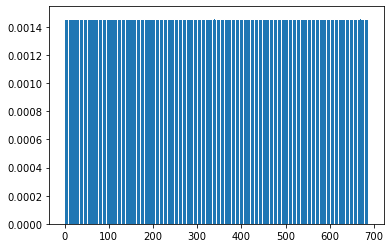

In [27]:
# Inspect probability distribution of word tokens
import matplotlib.pyplot as plt

plt.bar(range(len(output)), output)

In [28]:
seed_text = 'I love'
num_words = 50
generated_text = generate_text(model, seed_text, num_words)
print(generated_text)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x689 and 2067x150)

In [ ]:
# TODO: Create helper function to generate lyrics from model output